# Getting Started

In [1]:
import numpy as np
import sqlite3

import pandas as pd

pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [2]:
connection = sqlite3.connect(r"Path to database.sqlite file, because this file is too large for github, you can found it on: https://www.kaggle.com/datasets/hugomathien/soccer?resource=download")


# Create DataFrame

In [3]:

players_df = pd.read_sql_query("SELECT * FROM Player", connection)
stats_df = pd.read_sql_query("SELECT * FROM Player_Attributes", connection)
team_df =  pd.read_sql_query("SELECT * FROM Team_Attributes", connection)


In [4]:
league_df = pd.read_sql_query("SELECT * FROM League", connection)

In [5]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
cursor = connection.cursor()
#new_column_name = 'target'
#cursor.execute(f'ALTER TABLE Match ADD COLUMN {new_column_name} INTEGER')
# Step 3: Update the values in the new column based on conditions
update_query = '''
    UPDATE Match
    SET target = 
        CASE
            WHEN home_team_goal > away_team_goal THEN 1
            WHEN home_team_goal = away_team_goal THEN 0
            else 2
        END;
'''

cursor.execute(update_query)
connection.commit()


In [7]:
matches_df = pd.read_sql_query("SELECT * FROM Match", connection)

In [10]:
team_df

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [11]:
matches_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,target
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [9]:
stats_df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


# Learn Some Database Attributes

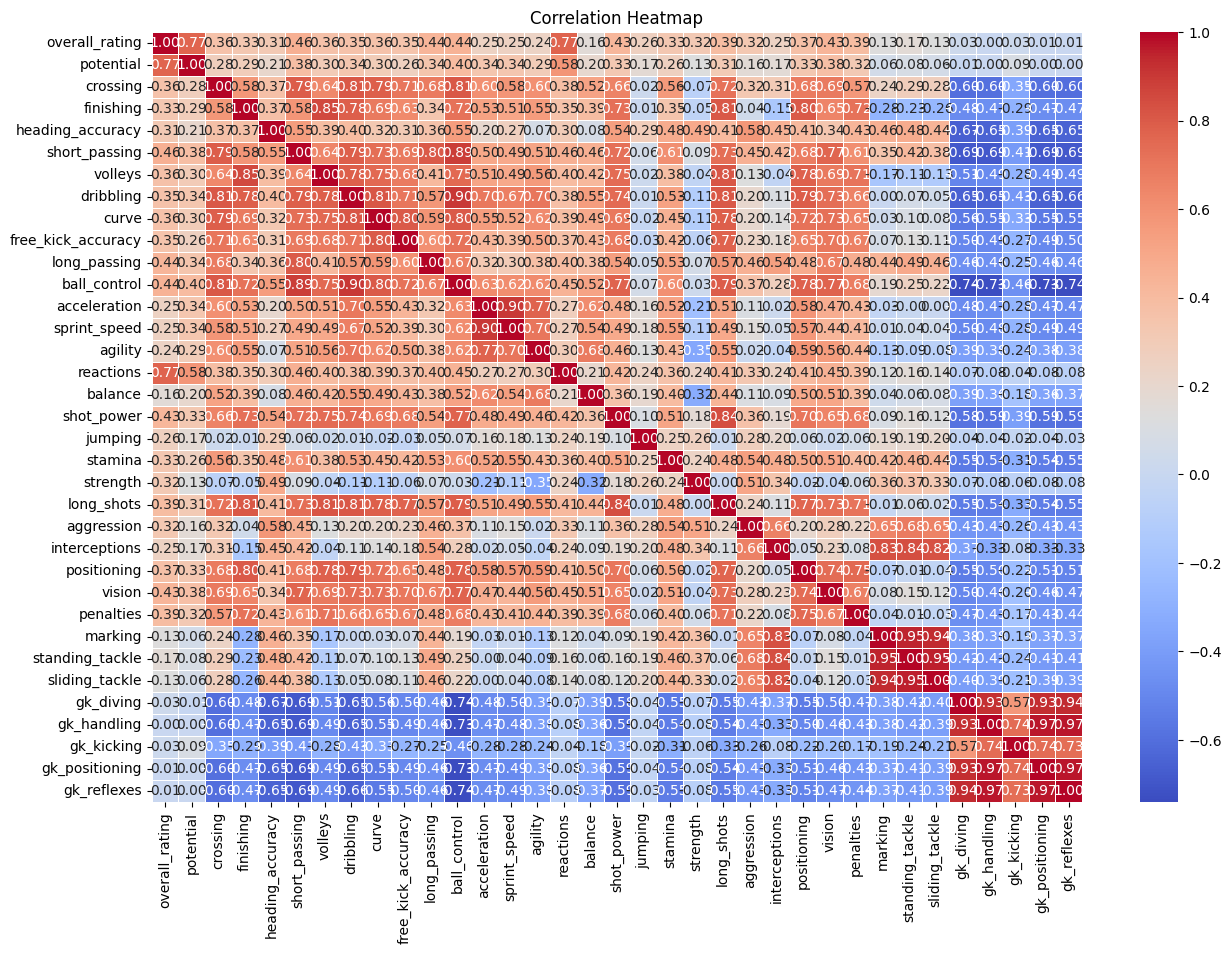

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Compute the correlation matrix
correlation_matrix = stats_df[['overall_rating', 'potential','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
                                'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Execute a query to fetch the schema information

cursor.execute("SELECT name, sql FROM sqlite_master WHERE type='table';")

# Fetch all the tables and their corresponding CREATE TABLE statements
tables = cursor.fetchall()

# Print the schema information
for table in tables:
    table_name, create_statement = table
    print(f"Table: {table_name}")
    print("Schema:")
    print(create_statement)
    print("\n")

# Close the connection

Table: sqlite_sequence
Schema:
CREATE TABLE sqlite_sequence(name,seq)


Table: Player_Attributes
Schema:
CREATE TABLE "Player_Attributes" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,
	`player_fifa_api_id`	INTEGER,
	`player_api_id`	INTEGER,
	`date`	TEXT,
	`overall_rating`	INTEGER,
	`potential`	INTEGER,
	`preferred_foot`	TEXT,
	`attacking_work_rate`	TEXT,
	`defensive_work_rate`	TEXT,
	`crossing`	INTEGER,
	`finishing`	INTEGER,
	`heading_accuracy`	INTEGER,
	`short_passing`	INTEGER,
	`volleys`	INTEGER,
	`dribbling`	INTEGER,
	`curve`	INTEGER,
	`free_kick_accuracy`	INTEGER,
	`long_passing`	INTEGER,
	`ball_control`	INTEGER,
	`acceleration`	INTEGER,
	`sprint_speed`	INTEGER,
	`agility`	INTEGER,
	`reactions`	INTEGER,
	`balance`	INTEGER,
	`shot_power`	INTEGER,
	`jumping`	INTEGER,
	`stamina`	INTEGER,
	`strength`	INTEGER,
	`long_shots`	INTEGER,
	`aggression`	INTEGER,
	`interceptions`	INTEGER,
	`positioning`	INTEGER,
	`vision`	INTEGER,
	`penalties`	INTEGER,
	`marking`	INTEGER,
	`standing_tackle`	INTEGE

In [ ]:
matches_df

In [ ]:
features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA','awayscore1', 'homescore1', 
                    'awayscore2', 'homescore2', 'awayscore3', 'homescore3', 'awayscore4', 'homescore4', 'awayscore5', 'homescore5', 'awayscore6',
                      'homescore6', 'awayscore7', 'homescore7', 'Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 
                      'Home_Player_Overall_3', 'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7', 
                      'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10', 'Away_Player_Overall_11', 'Away_Player_Overall_12', 
                      'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16', 'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21']

# Calculate the covariance of each feature with 'target'
covariances = {feature: matches_df[feature].cov(matches_df['target']) for feature in features}
sorted_covariances = sorted(covariances.items(), key=lambda x: x[1], reverse=True)
l = []
# Print the result
for feature, covariance in sorted_covariances:
    l.append(feature)
    print(f"Covariance between {feature} and 'target': {covariance}")
print(l)

In [14]:
stats_df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [15]:
column_names = stats_df.columns.tolist()
print(column_names)


['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


# Preporcessing

### 1. Collecting data from multiple tables:

In [10]:
subquery = '''
    SELECT team_api_id, MAX(date) as latest_date, buildUpPlaySpeed,buildUpPlayPassing, chanceCreationPassing,chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth
    FROM Team_Attributes
    GROUP BY team_api_id
'''
test = pd.read_sql_query(subquery, connection)

In [11]:
overall_rate = '''
    SELECT player_api_id, overall_rating
    FROM Player_Attributes
    GROUP BY player_api_id
'''
player = pd.read_sql_query(overall_rate, connection)

In [12]:
player

,player_api_id,overall_rating
0,2625,61
1,2752,72
2,2768,74
3,2770,69
4,2790,67
...,...,...
11055,744907,53
11056,746419,59
11057,748432,58
11058,750435,60


### 2. Map to the matches_df DataFrame:

In [13]:
# Extract relevant date components

matches_df['date'] = pd.to_datetime(matches_df['date'],dayfirst=True)

matches_df['Year'] = matches_df['date'].dt.year
matches_df['Month'] = matches_df['date'].dt.month

matches_df['Day'] = matches_df['date'].dt.day

C:\Users\Admin\AppData\Local\Temp\ipykernel_21792\3431658804.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  matches_df['date'] = pd.to_datetime(matches_df['date'],dayfirst=True)


In [15]:
# Create a dictionary mapping team_api_id to BuildUpPlay from test_df
team_api_id_to_buildupplay1 = test.set_index('team_api_id')['buildUpPlaySpeed'].to_dict()
team_api_id_to_buildupplay2 = test.set_index('team_api_id')['buildUpPlayPassing'].to_dict()
team_api_id_to_buildupplay3 = test.set_index('team_api_id')['chanceCreationPassing'].to_dict()
team_api_id_to_buildupplay4 = test.set_index('team_api_id')['chanceCreationShooting'].to_dict()
team_api_id_to_buildupplay5 = test.set_index('team_api_id')['defencePressure'].to_dict()
team_api_id_to_buildupplay6 = test.set_index('team_api_id')['defenceAggression'].to_dict()
team_api_id_to_buildupplay7 = test.set_index('team_api_id')['defenceTeamWidth'].to_dict()
# Add a new column "awayscore" to matches_df based on the mapping
matches_df['awayscore1'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay1)
matches_df['homescore1'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay1)
matches_df['awayscore2'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay2)
matches_df['homescore2'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay2)
matches_df['awayscore3'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay3)
matches_df['homescore3'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay3)
matches_df['awayscore4'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay4)
matches_df['homescore4'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay4)
matches_df['awayscore5'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay5)
matches_df['homescore5'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay5)
matches_df['awayscore6'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay6)
matches_df['homescore6'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay6)
matches_df['awayscore7'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay7)
matches_df['homescore7'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay7)

#matches_df['awayscore'].fillna(0, inplace=True)
#matches_df['homescore'].fillna(0, inplace=True)

In [16]:
mapping_player = player.set_index('player_api_id')['overall_rating'].to_dict()
player_index_list = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 
                     'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 
                     'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11']
for i in range(11):
    new_column = 'Home_Player_Overall_{}'.format(i)
    matches_df[new_column] = matches_df[player_index_list[i]].map(mapping_player)
for i in range(10,22):
    new_column = 'Away_Player_Overall_{}'.format(i)
    matches_df[new_column] = matches_df[player_index_list[i]].map(mapping_player)


In [17]:
matches_df['sum_home'] =matches_df[['Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 'Home_Player_Overall_3',
                      'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7',
                        'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10',]].sum(axis=1)

matches_df['sum_away'] =matches_df[[ 'Away_Player_Overall_11','Away_Player_Overall_12', 'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16',
                      'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21']].sum(axis=1)

In [18]:
matches_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,target,Year,Month,Day,awayscore1,homescore1,awayscore2,homescore2,awayscore3,homescore3,awayscore4,homescore4,awayscore5,homescore5,awayscore6,homescore6,awayscore7,homescore7,Home_Player_Overall_0,Home_Player_Overall_1,Home_Player_Overall_2,Home_Player_Overall_3,Home_Player_Overall_4,Home_Player_Overall_5,Home_Player_Overall_6,Home_Player_Overall_7,Home_Player_Overall_8,Home_Player_Overall_9,Home_Player_Overall_10,Away_Player_Overall_10,Away_Player_Overall_11,Away_Player_Overall_12,Away_Player_Overall_13,Away_Player_Overall_14,Away_Player_Overall_15,Away_Player_Overall_16,Away_Player_Overall_17,Away_Player_Overall_18,Away_Player_Overall_19,Away_Player_Overall_20,Away_Player_Overall_21,sum_home,sum_away
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,2008,8,17,47.0,58.0,39.0,38.0,38.0,30.0,49.0,56.0,45.0,36.0,46.0,57.0,67.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,2008,8,16,62.0,54.0,52.0,51.0,42.0,47.0,62.0,32.0,45.0,44.0,52.0,58.0,52.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2,2008,8,16,52.0,53.0,51.0,43.0,60.0,52.0,47.0,42.0,53.0,59.0,50.0,47.0,61.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

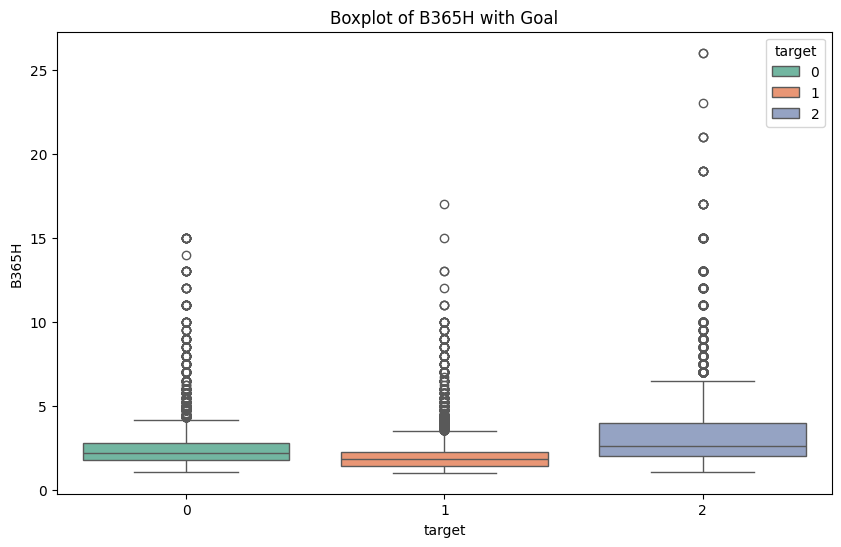

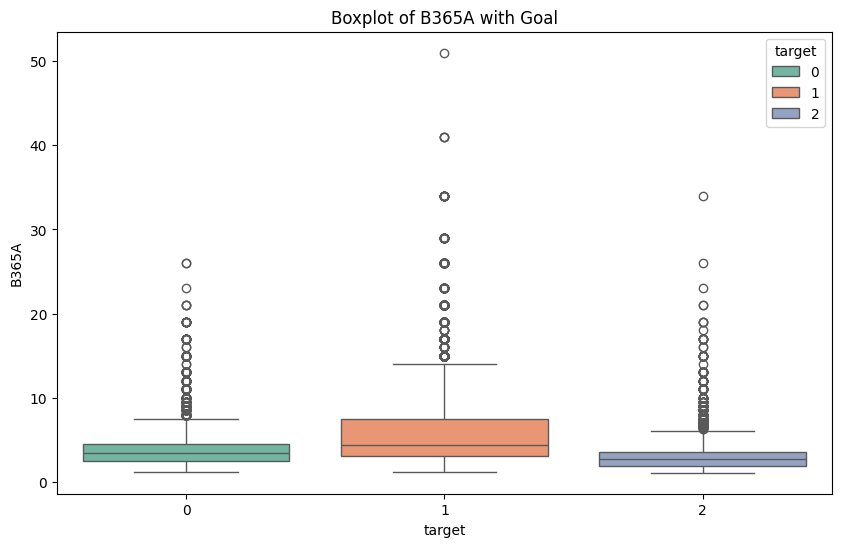

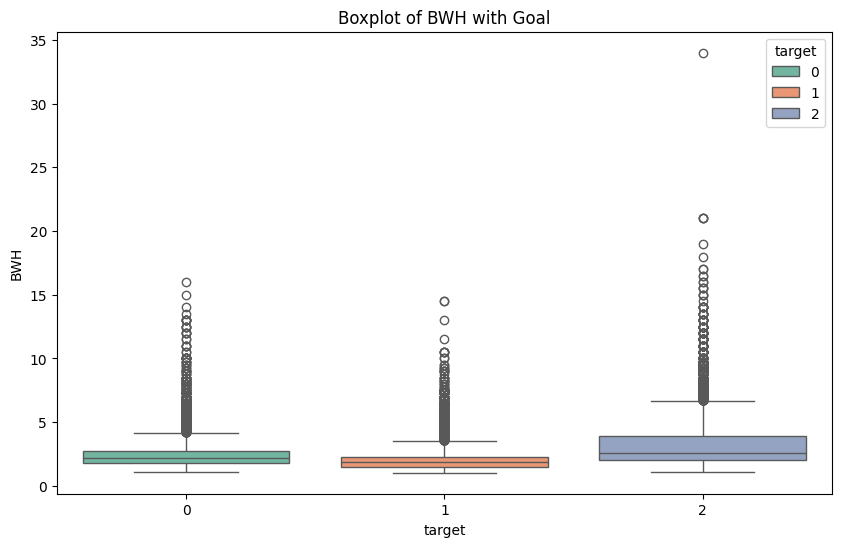

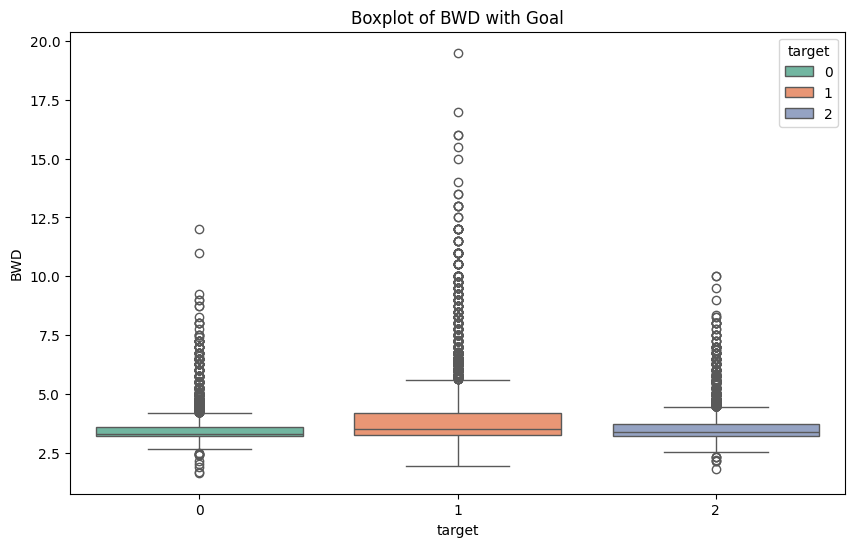

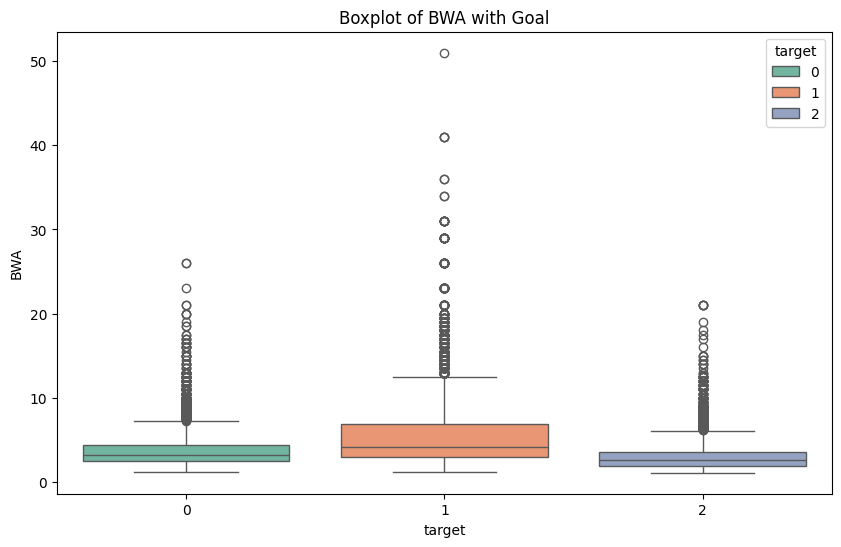

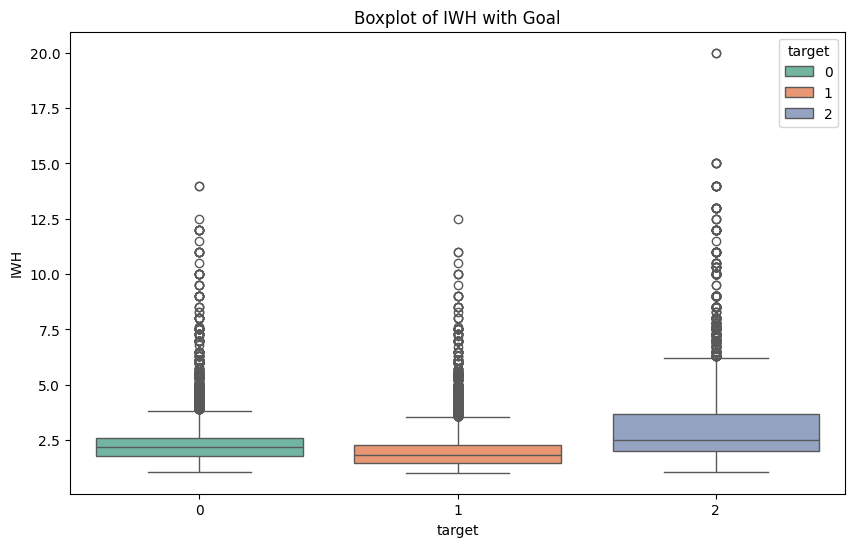

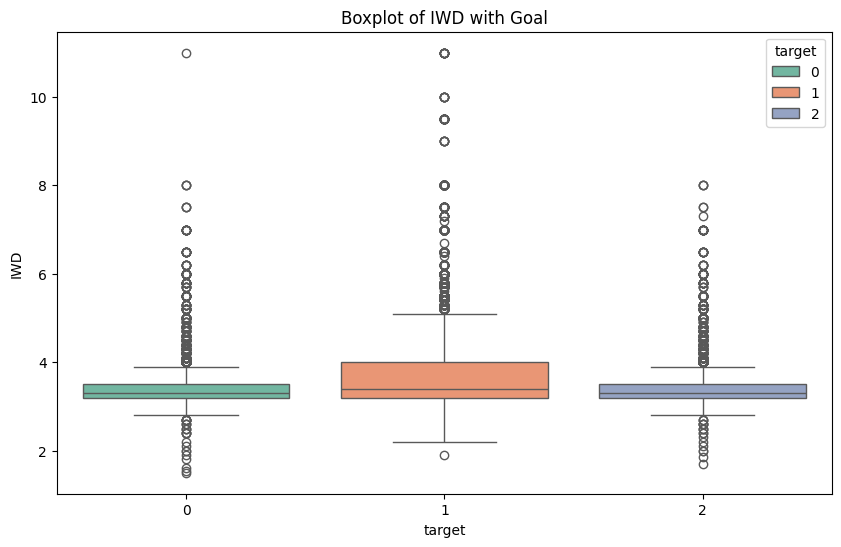

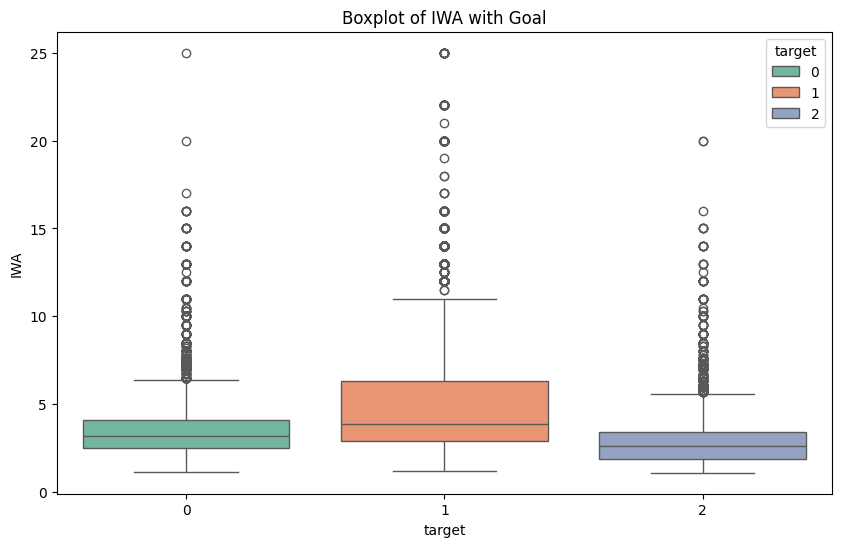

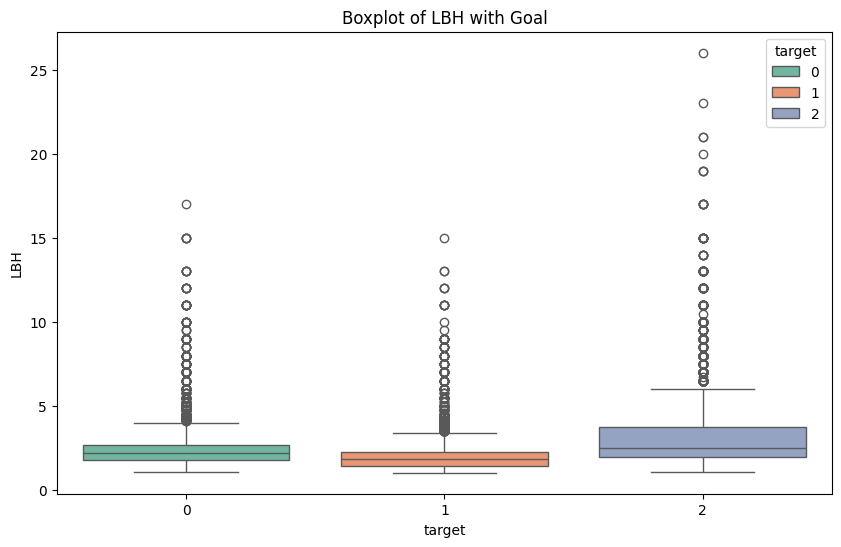

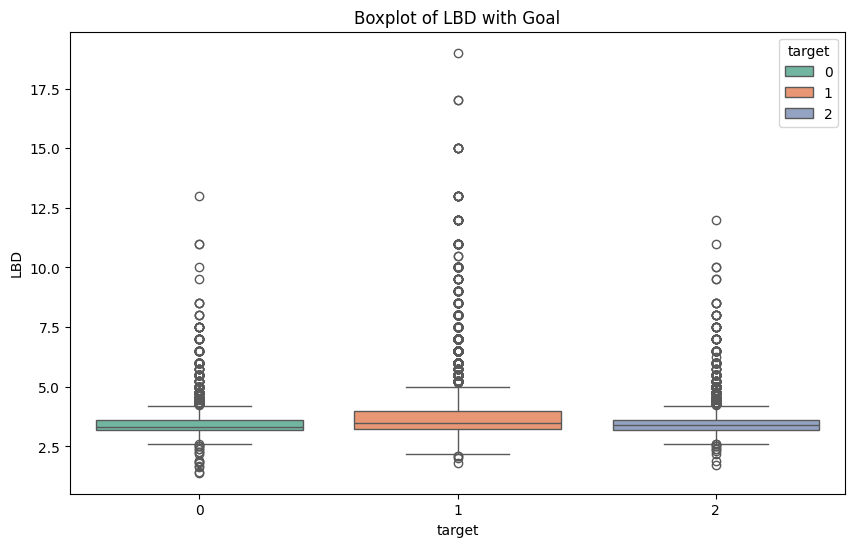

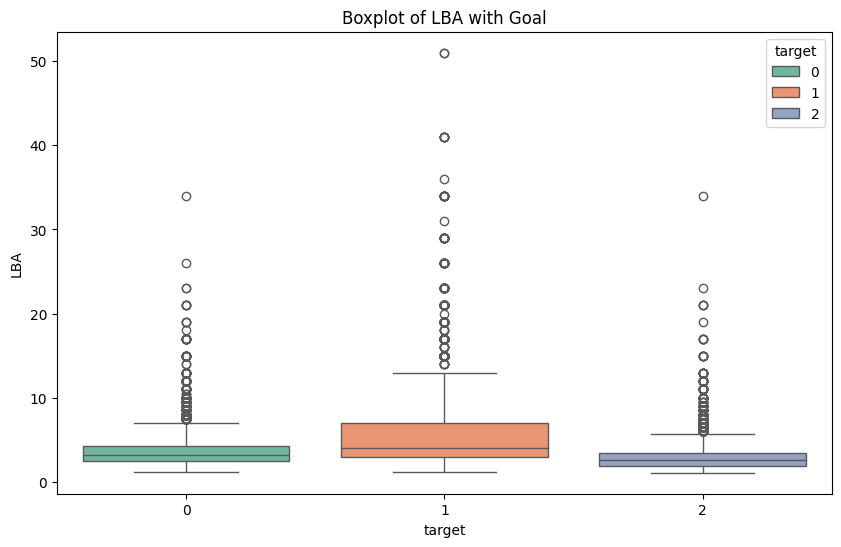

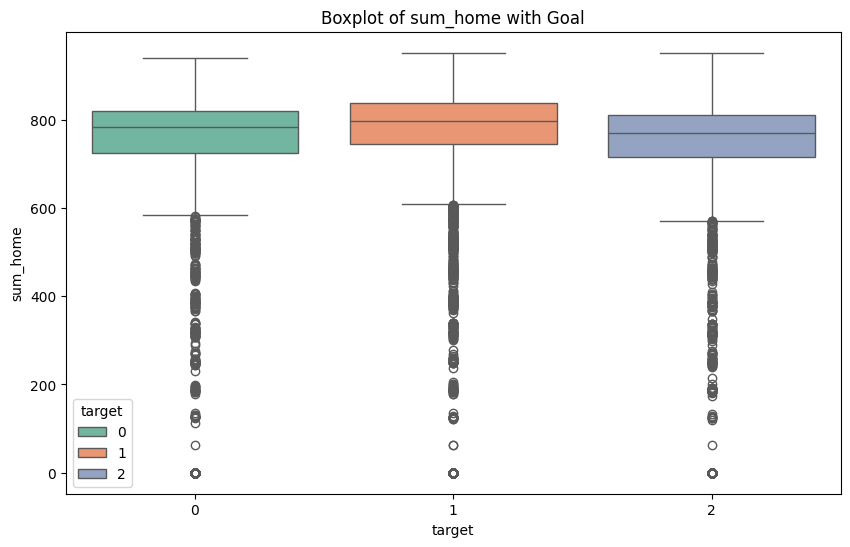

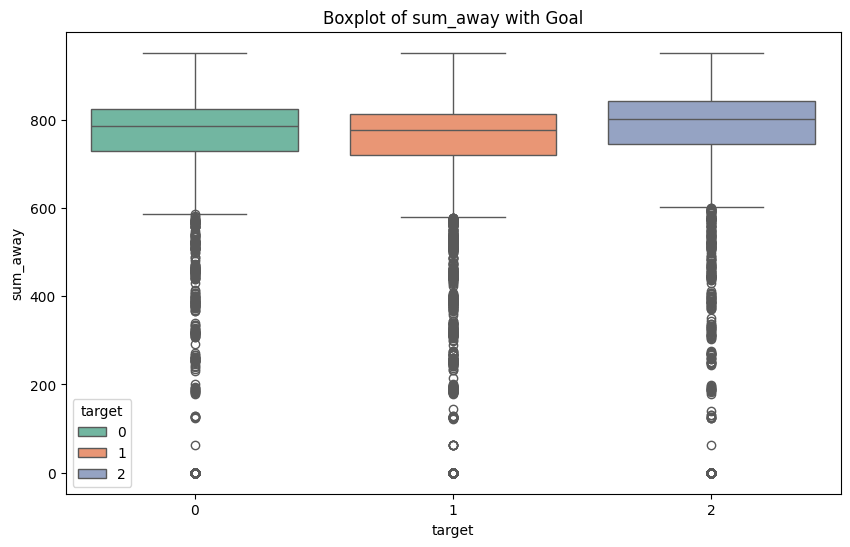

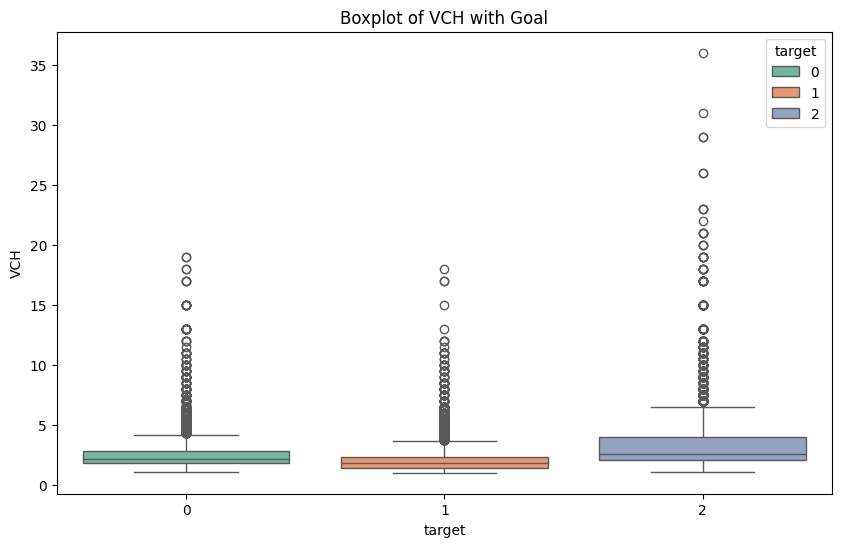

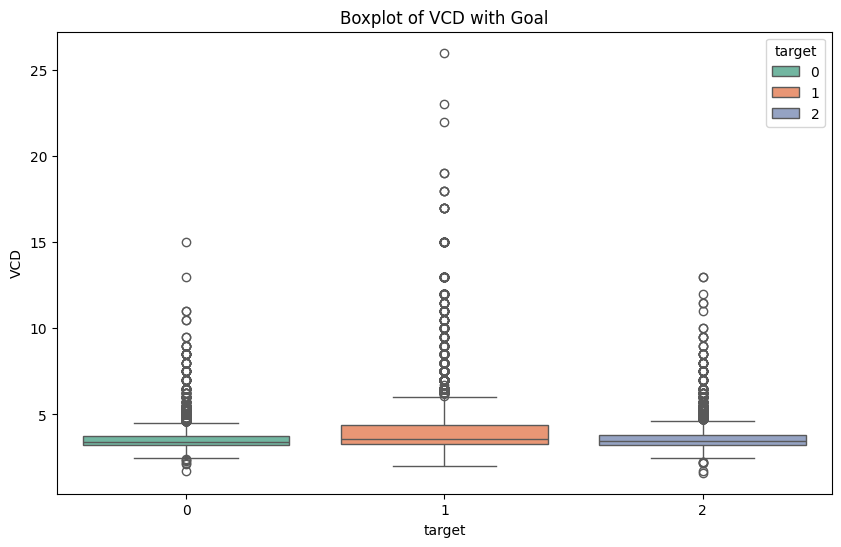

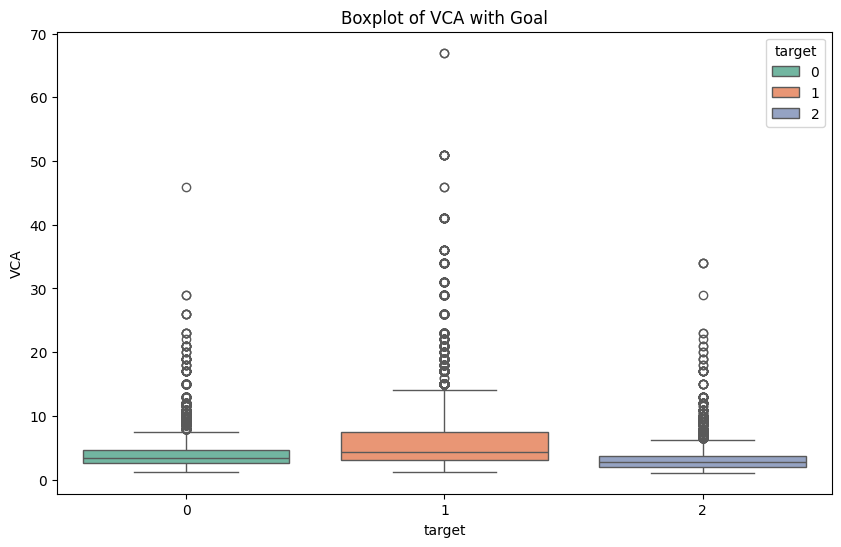

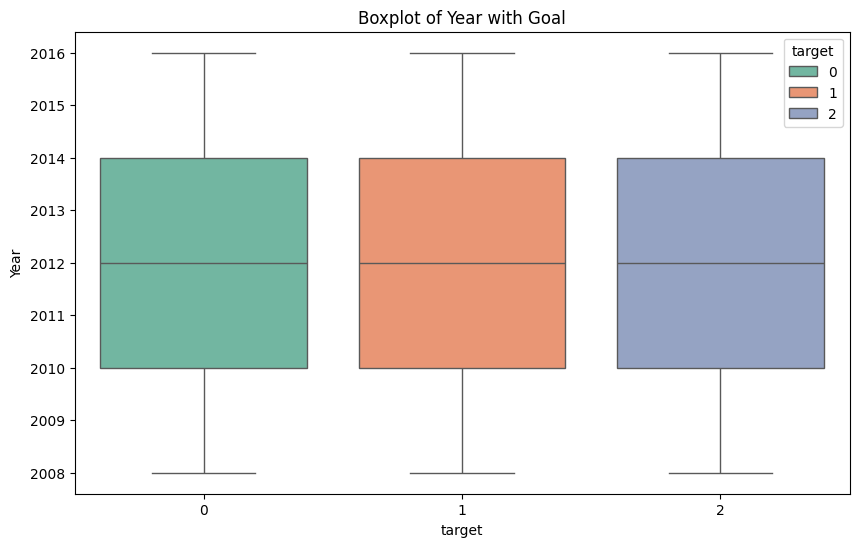

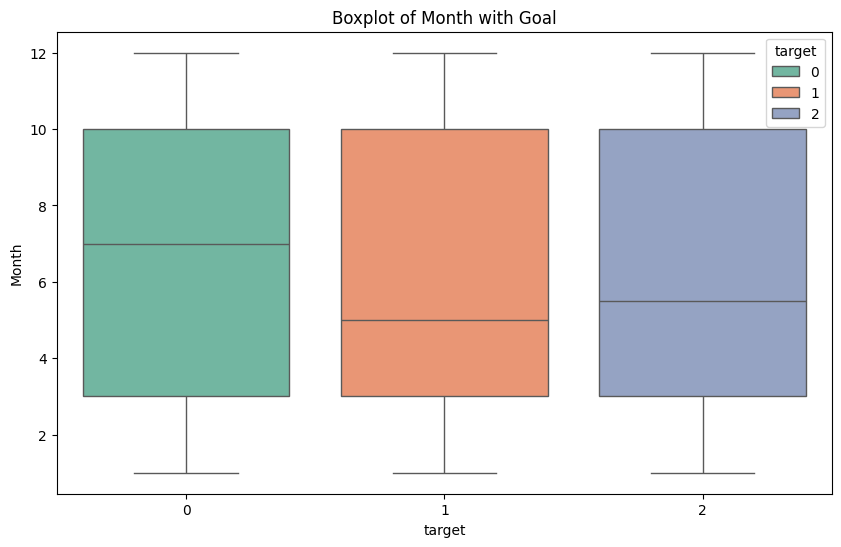

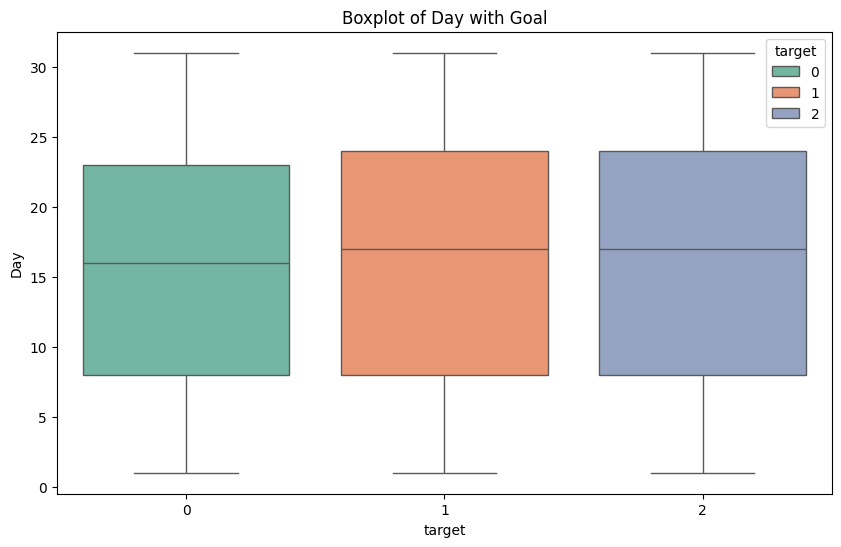

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
features = matches_df[['B365H', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'sum_home','sum_away',
                       'VCH', 'VCD', 'VCA' ,'Year','Month','Day'
                       ]]  
target = matches_df['target']
# Create boxplots for selected features
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=matches_df,hue=target, palette='Set2')
    plt.title(f'Boxplot of {feature} with Goal')
    plt.show()

### 3. Drop NAN Samples:

In [20]:
# Specify the columns to check for null values
columns_to_check = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
                        'homescore6', 'awayscore7', 'homescore7', 'Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 
                        'Home_Player_Overall_3', 'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7', 
                        'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10', 'Away_Player_Overall_11', 'Away_Player_Overall_12', 
                        'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16', 'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21',
                       'VCH', 'VCD', 'VCA'
                    ]

# Drop rows where any of the specified columns have null values
matches_df = matches_df.dropna(subset=columns_to_check, how='any')

# If you want to drop rows only when all specified columns have null values, use 'all' instead of 'any':
# matches_df = matches_df.dropna(subset=columns_to_check, how='all')


In [21]:
matches_df.shape

(19498, 158)

In [22]:
sub_df = matches_df[matches_df['league_id'] == 10257]

# Training Models


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import xgboost as xgb

In [39]:
# Extract features and target from DataFrame
features = sub_df[['B365H', 'B365D','B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'sum_home','sum_away', 
                       'VCH', 'VCD', 'VCA' ,'Year','Month','Day'
                       ]]  
target = sub_df['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [72]:
from imblearn.over_sampling import SMOTE

minority_class_indices = y_train.isin([1, 2])

# Extract minority class samples
X_minority = X_train[minority_class_indices]
y_minority = y_train[minority_class_indices]

# Apply SMOTE only to minority class samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_minority, y_minority)

# Combine the resampled minority class samples with the majority class samples
X_balanced = pd.concat([X_train, X_resampled], ignore_index=True)
y_balanced = pd.concat([y_train, y_resampled], ignore_index=True)

# Display the balanced DataFrame
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)


In [ ]:
balanced_df

In [31]:
sub_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,target,Year,Month,Day,awayscore1,homescore1,awayscore2,homescore2,awayscore3,homescore3,awayscore4,homescore4,awayscore5,homescore5,awayscore6,homescore6,awayscore7,homescore7,Home_Player_Overall_0,Home_Player_Overall_1,Home_Player_Overall_2,Home_Player_Overall_3,Home_Player_Overall_4,Home_Player_Overall_5,Home_Player_Overall_6,Home_Player_Overall_7,Home_Player_Overall_8,Home_Player_Overall_9,Home_Player_Overall_10,Away_Player_Overall_10,Away_Player_Overall_11,Away_Player_Overall_12,Away_Player_Overall_13,Away_Player_Overall_14,Away_Player_Overall_15,Away_Player_Overall_16,Away_Player_Overall_17,Away_Player_Overall_18,Away_Player_Overall_19,Away_Player_Overall_20,Away_Player_Overall_21,sum_home,sum_away
10256,10257,10257,10257,2008/2009,1,2008-08-31,537632,8524,8551,1,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,5.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,1.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,8.0,10.0,10.0,42390.0,41930.0,39210.0,41869.0,39201.0,39190.0,39197.0,42579.0,42645.0,38762.0,27657.0,27691.0,22355.0,41378.0,24792.0,41878.0,24854.0,38938.0,37541.0,39393.0,42041.0,30284.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.05,3.10,4.00,2.00,2.90,3.85,1.85,3.10,4.00,1.83,2.88,4.33,NaN,NaN,NaN,1.95,2.88,3.8,2.00,3.0,4.33,2.00,3.00,3.50,2.00,3.0,4.0,1.83,3.00,4.20,1,2008,8,31,47.0,64.0,48.0,37.0,64.0,38.0,52.0,51.0,44.0,36.0,49.0,63.0,51.0,49.0,67.0,71.0,66.0,72.0,69.0,67.0,62.0,69.0,74.0,70.0,73.0,73.0,72.0,70.0,63.0,74.0,68.0,66.0,69.0,70.0,69.0,73.0,75.0,760.0,769.0
10257,10258,10257,10257,2008/2009,1,2008-08-31,537633,8529,8543,1,4,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,4.0,6.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,39599.0,24414.0,24412.0,24403.0,39763.0,24391.0,24405.0,39222.0,41326.0,42091.0,96509.0,25735.0,30474.0,39731.0,30918.0,16351.0,39444.0,39334.0,41629.0,25594.0,25597.0,18506.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,3.00,3.00,2.50,2.60,2.95,2.65,2.60,2.90,2.70,2.70,2.75,2.60,NaN,NaN,NaN,2.62,2.90,2.5,2.80,3.0,2.70,3.00,2.80,2.40,2.70,3.0,2.6,2.50,3.00,2.62,2,2008,8,31,68.0,67.0,55.0,35.0,68.0,69.0,72.0,69.0,59.0,65.0,66.0,65.0,65.0,57.0,79.0,71.0,73.0,73.0,65.0,66.0,72.0,70.0,74.0,72.0,76.0,76.0,74.0,82.0,73.0,73.0,78.0,73.0,75.0,73.0,77.0,74.0,76.0,791.0,828.0
10259,10260,10257,10257,2008/2009,1,2008-08-31,537635,8533,8690,2,1,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0

### 1. Train by Support Vector Machine: 

In [40]:

model_svm = SVC(kernel= 'poly',degree=10, C = 1,probability=True )

# Train the model on the training set
model_svm.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model_svm.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.5f}')


Accuracy: 0.53050


In [41]:
y_pred = model_svm.predict(X_test).tolist()
y_test_list = y_test.tolist()

In [42]:
sum = 0

for actual, predicted, index in zip(y_test, y_pred, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred))

1.0917005545286502


We modify the decision of the model, it will predict the class that has the maximum expected value instead of maximum probability for a given input

In [41]:
prob_list = model_svm.predict_proba(X_test)

*# Expected value = (probability) x ( maximum bet rates for the corresponding class)*

In [48]:
def get_max_class(sample_probabilities, sample_row):
    # Calculate expected values based on the specified criteria
    expected_home = sample_probabilities[1] * sample_row['B365H']
    expected_draw = sample_probabilities[0] * sample_row['B365D']
    expected_away = sample_probabilities[2] * sample_row['B365A']
    
    # Find the class with the maximum expected value
    max_class = np.argmax([expected_home, expected_draw, expected_away])
    expected_value_list =[expected_home, expected_draw, expected_away]
    return max_class,expected_value_list
    


In [65]:
final_list = []
# Iterate through each sample in the probabilities array
for i, class_probabilities in enumerate(prob_list):
    # Get the corresponding row from sub_df for the current sample
    sample_row = sub_df.iloc[i]
    
    # Use the get_max_class function to get the class with the maximum expected value
    max_class = get_max_class(class_probabilities, sample_row)
    
    # Append the corresponding class to final_list
    final_list.append(max_class)

In [66]:
len(final_list)

541

In [67]:
sum = 0

for actual, predicted, index in zip(y_test, final_list, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred))

1.0071719038817009


### 2. Train by LSTM: 

In [62]:
# Extract features and target from DataFrame
features = matches_df[['B365H', 'B365A', 'BWH', 'BWA', 'IWH', 'IWA', 'LBH', 'LBA',
                       'awayscore2', 'homescore2', 'awayscore3', 'homescore3', 'awayscore4', 'homescore4', 'awayscore5', 'homescore5', 'awayscore6', 'homescore6', 'awayscore7', 'homescore7' ,'sum_away','sum_home', 'VCH', 'VCD', 'VCA', 'Year','Month','Day'
                       ]]  # Add the actual column names
target = matches_df['target']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 2: Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Reshape the data to be suitable for an LSTM

sequence_length = 10  # You can adjust this based on your data
X_train_seq = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

X_test_seq = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])



# Step 4: Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(sequence_length, X_train.shape[1]), dropout=0.2, recurrent_dropout=0.2,kernel_regularizer=l2(0.01)))
model_lstm.add(Dense(3, activation='softmax'))  # Assuming three classes
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model_lstm.fit(X_train_seq, y_train[sequence_length:], epochs=5, batch_size=8, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_acc = model_lstm.evaluate(X_test_seq, y_test[sequence_length:])
print(f'Test accuracy: {test_acc}')





Epoch 1/5


1559/1559 [==============================] - 8s 4ms/step - loss: 1.1283 - accuracy: 0.4566 - val_loss: 1.0710 - val_accuracy: 0.4564
Epoch 2/5
1559/1559 [==============================] - 6s 4ms/step - loss: 1.0684 - accuracy: 0.4600 - val_loss: 1.0675 - val_accuracy: 0.4564
Epoch 3/5
1559/1559 [==============================] - 6s 4ms/step - loss: 1.0660 - accuracy: 0.4605 - val_loss: 1.0666 - val_accuracy: 0.4564
Epoch 4/5
1559/1559 [==============================] - 6s 4ms/step - loss: 1.0658 - accuracy: 0.4605 - val_loss: 1.0658 - val_accuracy: 0.4564
Epoch 5/5
122/122 [==============================] - 0s 1ms/step - loss: 1.0668 - accuracy: 0.4573
Test accuracy: 0.4573264718055725


In [315]:
# Step 7: Get predictions for y_test
y_pred_probs = model_lstm.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1).tolist()

# Now, y_pred contains the predicted class labels for each sample in y_test
print("Predictions:", y_pred)


122/122 [==============================] - 0s 1ms/step
Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [316]:
sum = 0
for actual, predicted, index in zip(y_test, y_pred, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred))

0.14839074550128542


#### Discussion:
Firstly, we did not add regularizer and set the batch_size to 32, the model showed the tendency to be overfit when train_accuray reach 0.56 while test accuracy was only 0.38. We modified batch_size, add L2 regularizer and early_stopping to stablize the model's performance

### 3. Train by XGBoost:

In [61]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes
    'eval_metric': 'mlogloss',  # Logarithmic loss
    'eta': 0.1,  # Learning rate
    'max_depth':3,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 30
}

# Train the XGBoost model
num_round = 70
model_xgboot = xgb.train(params, dtrain, num_round)

# Predictions on the test set
y_pred = model_xgboot.predict(dtest)

# Convert predicted probabilities to class labels
y_pred_class = [int(round(pred)) for pred in y_pred]


# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_class)

print(f'Test accuracy: {test_accuracy:.5f}')

Test accuracy: 0.49908


In [53]:
sum = 0

y_test_list = y_test.tolist()
for actual, predicted, index in zip(y_test_list, y_pred_class, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred_class))

0.9711275415896488


# Test for new input

There are 2 ways that user can choose to use our models:
- They can predict by expected value
- They can preidct by probability only

In [57]:
import tkinter as tk
from tkinter import ttk
#Change the model if you want to
current_model = model_svm
# User can modify this sample to predict the result
user_input = {
         'B365H': 2.05,
        'B365D': 3.10,
        'B365A': 4.00,
        'BWH': 2.00,
        'BWD': 2.90,
        'BWA': 3.85,
        'IWH': 1.85,
        'IWD': 3.10,
        'IWA': 4.00,
        'LBH': 1.83,
        'LBD': 2.88,
        'LBA': 4.33,
        'sum_home': 760.1,
        'sum_away': 769.0,
        'VCH': 2.00,
        'VCD': 3.00,
        'VCA': 3.50,
        'Year': 2023,
        'Month': 5,
        'Day': 15,
 
    }
def predict_class():
    # Get the input values from the user
    # Convert the input values into a DataFrame
    user_df = pd.DataFrame([user_input])

    # Use the trained model to predict probabilities
    user_probabilities = current_model.predict_proba(user_df)
    

    #THIS SESSION PREDICT BY EXPECTED VALUE
    # Use the get_max_class function to get the class with the maximum expected value
    max_class, expected_list = get_max_class(user_probabilities[0], user_input)
    if max_class == 1:
        max_class = 'Home Team Win'
    elif max_class == 0:
        max_class = 'Draw'
    else:
        max_class = 'Away Team Win'
    # Display the predicted class and max expected value
    label_result.config(text=f"Predicted Class for max expected value: {max_class}")
    label_probabilities.config(text=f"Predicted Expected Value: {expected_list}")


    #ENABLE THIS SESSION IF YOU WANT TO PREDICT BY PROBABILITY INSTEAD OF EXPECTED VALUE
    """"
    max_index = np.argmax(user_probabilities[0]) 
    if max_index == 0:
        max_prob = 'Home Team Win'
    elif max_index == 1:
        max_prob = 'Draw'
    else:
        max_prob = 'Away Team Win'
    label_result.config(text=f"Predicted Class for pure max probability : {max_prob}")
    label_probabilities.config(text=f"Predicted pure max probability: {user_probabilities[0]}")
    """

def predict_sample():
    predict_class()

# Create the main application window
app = tk.Tk()
app.title("Prediction Form")

# Create form elements
fields = ['B365H', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'sum_home', 'sum_away',
          'VCH', 'VCD', 'VCA', 'Year', 'Month', 'Day']

# Create entry widgets dynamically
entry_widgets = {}
for i, field in enumerate(fields):
    label = ttk.Label(app, text=field + ":")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry_widgets[field] = ttk.Entry(app)
    entry_widgets[field].grid(row=i, column=1, padx=5, pady=5)
    # Insert sample values into entry widgets for testing
    entry_widgets[field].insert(0, str(user_input.get(field, '')))

# Add button and result labels
button_predict = ttk.Button(app, text="Predict Sample", command=predict_sample)
button_predict.grid(row=len(fields), column=0, columnspan=2, pady=10)

label_result = ttk.Label(app, text="Predicted Class: ")
label_result.grid(row=len(fields) + 1, column=0, columnspan=2, pady=10)
label_probabilities = ttk.Label(app, text="Predicted Probabilities: ")
label_probabilities.grid(row=len(fields) + 2, column=0, columnspan=2, pady=10)

# Start the GUI event loop
app.mainloop()

In [63]:

from joblib import dump, load

# Save model
dump(model_svm, 'SVM_Model.joblib')
dump(model_lstm, 'LSTM_Model.joblib')
dump(model_xgboot, 'XGBoot_Model.joblib')



['XGBoot_Model.joblib']